# Tree-Cluster States

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_histogram

In [2]:
# Return number of qubits of a TCS given a branching vector
def find_n_qubits(branch_vector):
    n_qubits = 1
    for i in range(1, len(branch_vector) + 1, 1):
        n_qubits += np.product(branch_vector[0:i])
    return n_qubits

In [3]:
def make_repeater_circuit(branch_vector):
    n_qubits = find_n_qubits(branch_vector)
    global qr, cr
    qr = QuantumRegister(n_qubits + 1, 'q')
    cr = ClassicalRegister(6, 'c')
    circ = QuantumCircuit(qr, cr)
    # Apply Hadamard to each qubit in the TCS
    for q in range(1, n_qubits + 1):
        circ.h(q)
    # Create first layer of TCS
    for k in range(2, 2 + branch_vector[0]):
        circ.cz(1, k)
    # Stop if there is only one layer
    if len(branch_vector) == 1:
        return circ
    # Create remaining layers
    qubit_counter = 2
    for layer in range(len(branch_vector)):
        if layer + 1 == len(branch_vector):
            break
        qubits_in_layer = np.product(branch_vector[0:layer + 1])
        children = -1
        for qubit in range(qubits_in_layer): 
            for child in range(branch_vector[layer + 1]):
                children += 1
                circ.cz(qubit_counter + qubit, qubit_counter + qubits_in_layer + children)
    return circ

## Quantum One-Way Repeater Protocol

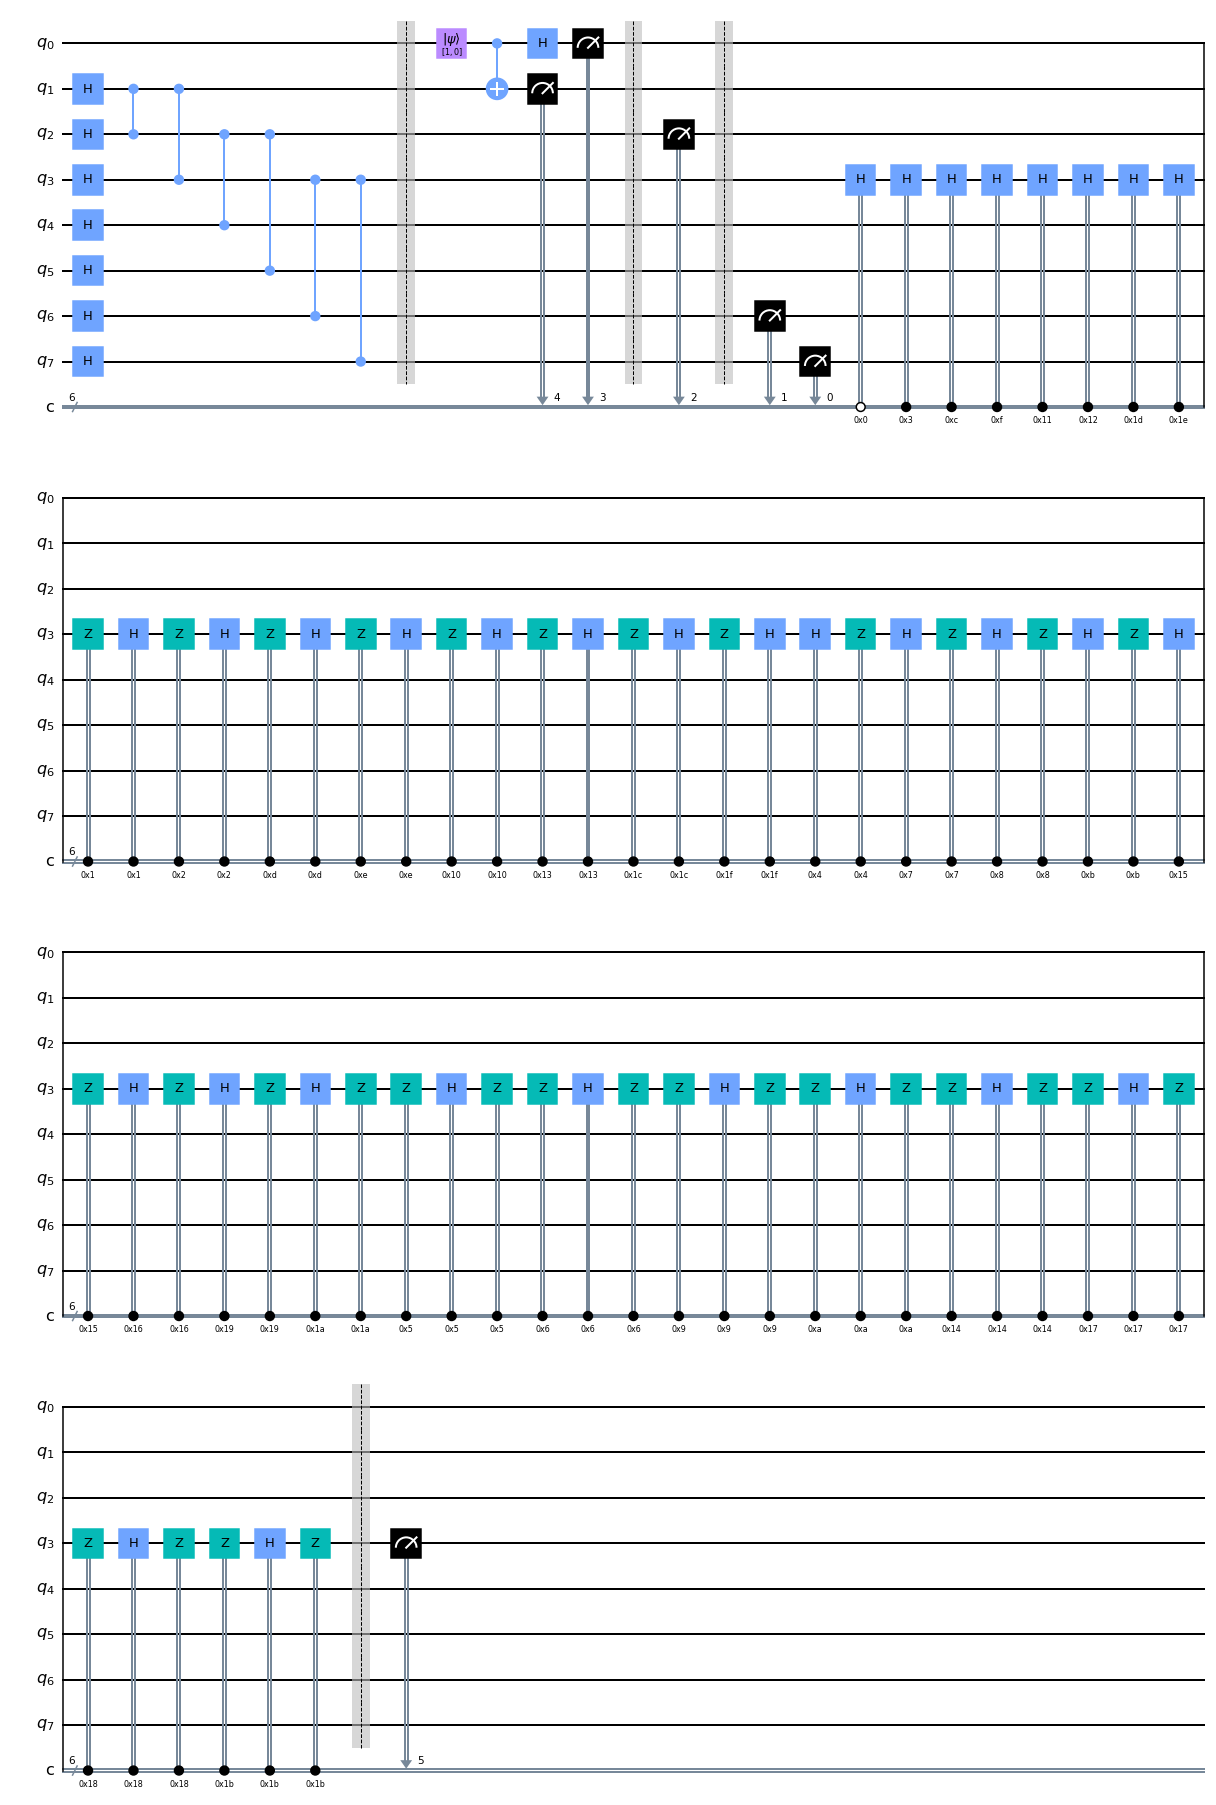

In [97]:
# Initialize the circuit
circ = make_repeater_circuit([2, 2])
circ.barrier()

# Add message and entangle with root qubit
# circ.initialize([1 / 2, np.sqrt(3) / 2], 0)
circ.initialize([1, 0], 0)
circ.cx(0, 1)
circ.h(0)
# Store x1 in cbit 0, x2 in cbit 1
circ.measure(0, 3)
circ.measure(1, 4)
circ.barrier()

# Store x3 in cbit 2
circ.measure(2, 2)
circ.barrier()

# Measure 2nd level qubits of branch 2 in z
circ.measure(6, 1)
circ.measure(7, 0)


# Apply unitaries based on measurements
circ.h(3).c_if(cr, 0)
circ.h(3).c_if(cr, 3)
circ.h(3).c_if(cr, 12)
circ.h(3).c_if(cr, 15)
circ.h(3).c_if(cr, 17)
circ.h(3).c_if(cr, 18)
circ.h(3).c_if(cr, 29)
circ.h(3).c_if(cr, 30)

circ.z(3).c_if(cr, 1); circ.h(3).c_if(cr, 1)
circ.z(3).c_if(cr, 2); circ.h(3).c_if(cr, 2)
circ.z(3).c_if(cr, 13); circ.h(3).c_if(cr, 13)
circ.z(3).c_if(cr, 14); circ.h(3).c_if(cr, 14)
circ.z(3).c_if(cr, 16); circ.h(3).c_if(cr, 16)
circ.z(3).c_if(cr, 19); circ.h(3).c_if(cr, 19)
circ.z(3).c_if(cr, 28); circ.h(3).c_if(cr, 28)
circ.z(3).c_if(cr, 31); circ.h(3).c_if(cr, 31)

circ.h(3).c_if(cr, 4); circ.z(3).c_if(cr, 4)
circ.h(3).c_if(cr, 7); circ.z(3).c_if(cr, 7)
circ.h(3).c_if(cr, 8); circ.z(3).c_if(cr, 8)
circ.h(3).c_if(cr, 11); circ.z(3).c_if(cr, 11)
circ.h(3).c_if(cr, 21); circ.z(3).c_if(cr, 21)
circ.h(3).c_if(cr, 22); circ.z(3).c_if(cr, 22)
circ.h(3).c_if(cr, 25); circ.z(3).c_if(cr, 25)
circ.h(3).c_if(cr, 26); circ.z(3).c_if(cr, 26)

circ.z(3).c_if(cr, 5); circ.h(3).c_if(cr, 5); circ.z(3).c_if(cr, 5)
circ.z(3).c_if(cr, 6); circ.h(3).c_if(cr, 6); circ.z(3).c_if(cr, 6)
circ.z(3).c_if(cr, 9); circ.h(3).c_if(cr, 9); circ.z(3).c_if(cr, 9)
circ.z(3).c_if(cr, 10); circ.h(3).c_if(cr, 10); circ.z(3).c_if(cr, 10)
circ.z(3).c_if(cr, 20); circ.h(3).c_if(cr, 20); circ.z(3).c_if(cr, 20)
circ.z(3).c_if(cr, 23); circ.h(3).c_if(cr, 23); circ.z(3).c_if(cr, 23)
circ.z(3).c_if(cr, 24); circ.h(3).c_if(cr, 24); circ.z(3).c_if(cr, 24)
circ.z(3).c_if(cr, 27); circ.h(3).c_if(cr, 27); circ.z(3).c_if(cr, 27)

# Measure the encoded qubit
circ.barrier()
circ.measure(3, 5)

circ.draw('mpl')

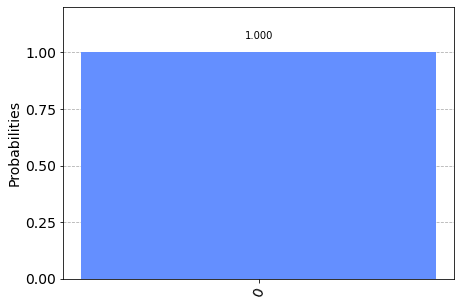

In [98]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circ, backend), shots=100000)
res = job.result()
counts = res.get_counts(circ)
# print(counts)
measurement = {}
measurement['0'] = sum([val for key, val in counts.items() if key[0] == '0'])
measurement['1'] = sum([val for key, val in counts.items() if key[0] == '1'])
measurement = {key : val for key, val in measurement.items() if val > 0}

# counts2 = {key[0] : val for key, val in counts.items() if key[1:] == '10101'}
# print(counts2)
plot_histogram(measurement)

In [23]:
qr2 = QuantumRegister(2)
cr2 = ClassicalRegister(2)
qc = QuantumCircuit(qr2, cr2)
qc.h(0)
qc.measure(0, 0)
# qc.h(0).c_if(cr2, 1)
# qc.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1000)
res = job.result()
counts = res.get_counts(qc)
print(counts)

{'00': 514, '01': 486}


In [27]:
len(counts)

32